# **GitHub Link -**




https://colab.research.google.com/github/BMB1978/Mageshbabu/blob/main/Google_play_store_app_review.ipynb#scrollTo=uIxb2OgPiLlx
```
# This is formatted as code
```



**EDA** **on** **play** **store** **app** **review**

**by** **Magesh** **Babu**

**Problem statement**

. the play store apps data has enormous potential to drive app making bussiness to success actionable insights can be drwan for devlopers to work on and capture the android market
. Each app(row) has value for category, rating,size,and more .another dataset contain customer reviews of the android apps.
.explotre and analuse the data to discover key factors responsible for app engagement and succes.

**BUSINESS CONTEXT**

The Play Store app has enormous potential to drive app-making business success. Actionable insights can be drawn for devlopers to wok on and captue the android market. Each app(row) has value for category, rating,size,and more .another dataset contain customer reviews of the android apps.explotre and analuse the data to discover key factors responsible for app engagement and succes.

**importing important packages**

In [1]:
df['Type'].replace(np.nan,'free,inplace = true')

NameError: name 'df' is not defined

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# importing the datetime library from date time import date time
# ignoring warnings
import warnings
warnings.filterwarnings('ignore')


**exploring play store data**

**loading the data set**

In [ ]:
df = pd.read_csv('/Play Store Data.csv')

In [ ]:
df.head()

**Data Discription**

1.   App : contains the name of the app with a short description(optional)

2.   category: it gives the category to the app

3.   Rating: it contains the avarage rating the respective app recived from its users

4.  Reviews: it contains the number of users that have dropperd a review for the respective app

5. Size: it conatins the disk space required to install the respecitve app.

6. Instslls: it gives the rounded figue of numbers of time the respective app was downloaded

7. Types:  it satates whether an app is free to use or paid.

8. Price: It gives the price payable to install the app. For free type apps, the price is zero.

9. Content rating: It states whether or not an app is suitable for all age groups or not.

10. Genres: It gives the genre(s) to which the respective app belongs.

11. Last updated: It gives the day in which the latest update was released.

12.  Current Ver: It gives the current version of the respective app.

13. Android Ver: It gives the android version of the respective app.









In [ ]:
#getting the information
df.info()

In [ ]:
#getting the shape
df.shape

In [ ]:
#finding the duplicate value
dup = df.duplicated().value_counts()
dup

In [ ]:
#visualising through bar graph
plt.figure(figsize= (10,6))
dup.plot(kind='bar',color=['g','r'])
plt.xticks(rotation=360)
plt.title("duplicate value")

In [ ]:
#droping the duplicate value
df= df.drop_duplicates()
df.duplicated().value_counts()


**Find the null values**

In [ ]:
df.isnull().sum()

In [ ]:
#visualizing null values through heatmap.
plt.figure(figsize=(25,10))
sns.heatmap(df.isnull(),cbar= False,yticklabels=False,cmap='viridis')
plt.xlabel("name of columns")
plt.title("place of missing values in column")

In [ ]:
#finding the unique values
print(df.apply(lambda col: col.unique()))

In [ ]:
df['Type'].value_counts()

In [ ]:
df['Type'].unique()

In [ ]:
df[df['Type'].isnull()]

**Since the Nan value in type belomgs to price 0 which means it should be of type free**

In [ ]:
#hence the null value is being replaced
df[df['Type'].isnull()]

**treating null values rating column**

In [ ]:
#how many null value are there
df["Rating"].isnull().sum()

In [ ]:
#lets find the mean and median of it
mean_rating = df['Rating'].mean()
median_rating = df['Rating'].median()
round(mean_rating,1),round(median_rating,2)

In [ ]:
#lets check the box plot for its outliers
plt.figure(figsize=(15,6))
sns.boxplot(df['Rating'])

**Since there are a lot of outliers and we know that mean is affected by Outliers and not the median, hence we will replace the null values with median**

In [ ]:
df['Rating'].replace(np.nan,df['Rating'].median(),inplace=True)

In [ ]:
#checkingfro null values now
df['Rating'].isnull().sum()

**Hence all the null values are replaced with median and now lets take care of outliers**

In [ ]:
# Listng all the bottom 5 values
sorted(df['Rating'])[-5 :]


In [ ]:
df[df['Rating'] == 19.0]

Since the rating cannot be 19 and also category cannot be 1.9

The entire row is misplaced because of one value of category column is missing so its better to drop the entire row.
t

In [ ]:
#checking the shape before dropping
df.shape

In [ ]:
#dropping the row number 10472
df=df.drop(10472)

In [ ]:
#check the shape after dropping
df.shape

In [ ]:
#lets checck the boxplot for its outlier
plt.figure(figsize = (15,6))
sns.boxplot(df['Rating'],color ='orange')
plt.title("outliers")
plt.grid()

**Observation

Since according to the formula there may be outliers but the rating usually range between 1 to 5 and we can see that there are no values beyond the
range. So not dropping the outliers.

Checking for null values for Current Version and Android Version
 **

In [ ]:
df.isnull().sum()

In [ ]:
df['Current Ver'].unique()

In [ ]:
df

**Since there are only 8 null values in current version and 2 in android version hence either we can replace it or drop it. lets replace it with Varies with device**

In [ ]:
df['Current Ver'].replace(np.nan, 'Varies with device', inplace = True)
df['Android Ver'].replace(np.nan, 'Varies with device', inplace = True)

In [ ]:
df.isnull().sum()

**Let's change the date time format**

In [ ]:
# The datetime.strptime funtion applied to the values in the last updated column to convert datatype from string to datetime
from datetime import datetime

df['Last Updated'] = df['Last Updated'].apply(lambda x: datetime.strptime(x, '%B %d, %Y'))
df.head()

In [ ]:
df.info()

**The column Installs contain unnecessary characters like come (,) and plus (+) which has to be removed.**

In [ ]:
df['Installs'].value_counts()

In [ ]:
df['Installs'] = df['Installs'].str.replace(r"[+,]", '')
df['Installs'].value_counts()

In [ ]:
# Changing the datatype of Installs from object to int
df['Installs'] = df['Installs'].astype(int)

In [ ]:
df.info()

**Defining a function to convert all the entries in KB to MB and then converting them to float datatype **bold text**

We can see that the values in the Size column contains data with different
units. 'M' stands for MB and 'k' stands for KB. To easily analyse this column, it is necessary to convert all the values to a single unit. In this case, we will convert all the units to MB.

We know that 1MB = 1024KB, to convert KB to MB, we must divide all the values which are in KB by 1024.**

In [ ]:
def kb_to_mb(val):
  try:
    if 'M' in val:
      return float(val[:-1])
    elif 'k' in val:
      return round(float(val[:-1])/1024, 2)
    else:
      return val
  except:
    return val


In [ ]:
# The kb_to_mb funtion applied to the size column

df['Size'] = df['Size'].apply(lambda x: kb_to_mb(x))
df.head()

In [2]:
df['Size'].value_counts()

NameError: name 'df' is not defined

In [ ]:
# Plottinfg the boxplot for the Size column except 'Varies with Device'
size_new = df[df['Size'] != 'Varies with device']['Size']

plt.figure(figsize = (15,6))
sns.boxplot(size_new, color = 'orange')
plt.title("Size Outliers")
plt.grid()


**There are outliers but we cannot remove them as they are the size of an app which can be as high as 100 mb and as low as 1mb also**

In [ ]:
df.info()

**The price column contain dollar sign which is a special character hence have to drop it because the machine wont understand the dollar sign as currency.**

**Also Changing the type of Price column from object to float**

In [ ]:
df['Price'].unique()

In [ ]:
df['Price'] = df['Price'].str.replace(r"[$]", '')
df['Price'].unique()

In [3]:
df['Price'] = df['Price'].astype(float)

NameError: name 'df' is not defined

**Also changing the datatype of Reviews to float**

In [ ]:
df['Reviews'] = df['Reviews'].astype(float)
df.info()

**Describing the Play Store columns**

In [4]:
df.describe().style.background_gradient()

NameError: name 'df' is not defined

**Correlation**

In [ ]:
plt.figure(figsize=(15,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(np.round(df.corr(),2),annot=True, cmap=cmap)

**Exploratory** **Data** **Analysis**

**Univariate Analysis**

1. **Which Category is most preffered by people?**

In [ ]:
df.head()

In [ ]:
df['Category'].value_counts()

In [ ]:
plt.figure(figsize = (10,12))
df['Category'].value_counts().plot(kind = 'barh', color = 'g').invert_yaxis()
plt.title('Most prefered category')

**Observation**

Looks like people like Family category for downloading the app.
Second best category is gaming.

**2. What is the overall ratings for an app?**

In [ ]:
df['Rating'].value_counts()

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(df['Rating'], bins = [1, 2, 3, 4, 5], color = 'g')
plt.title("Total Rating ")

**Observation**

Almost more than 80% of the app in playstore lies between the range of 4 - 5

3. **How many Installation happened? bold text **

In [ ]:
df.head()

In [ ]:
df['Installs'].value_counts().reset_index()

In [ ]:
plt.figure(figsize = (18,8))
sns.barplot(data = df, x = df['Installs'].value_counts().keys(), y = df['Installs'].value_counts())
plt.xticks(rotation = 45)
plt.title("Install Counts")
plt.xlabel("Installs");

**Observations**

There are 1488 apps with more than 10,00,000 downloads/ Installs.
almost same amount of apps have 1,00,00 and 100,00,000 downloads/ Installs.

**4. Find the top free apps**

In [5]:
df.head()

NameError: name 'df' is not defined

In [ ]:
# Filtering out free apps
free_apps = df[df['Type'] == 'Free']
free_apps['Type'].value_counts()

In [ ]:
# Sorting it with Installs
top_free_apps = free_apps[free_apps['Installs'] == free_apps['Installs'].max()]
top_free_apps.head()

In [ ]:
top_free_apps.shape

In [ ]:
top_free_apps['Category'].value_counts()

In [ ]:
# Visualizing using barplot
plt.figure(figsize = (18,8))
sns.barplot(data = top_free_apps, x = top_free_apps['Category'].value_counts().keys(),
            y = top_free_apps['Category'].value_counts())
plt.xticks(rotation = 45)
plt.title("Top Free App category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

**Observation**
Communication is the category which has a lot of interest of people when it comes to free apps.

Followed by the social category apps.

**5. Find the top Paid app text**

In [ ]:

df['Type'].unique()

In [ ]:
# Filtering out paid apps
paid_apps = df[df['Type'] == 'Paid']
paid_apps['Type'].value_counts()

In [ ]:
paid_apps.sort_values(["Price"],
               axis = 0, ascending = False,
               inplace = True,
               na_position = "first")
paid_apps

In [ ]:
paid_apps['Price'].value_counts()

In [ ]:
plt.figure(figsize = (10,20))
sns.barplot(data = paid_apps, x = paid_apps['Price'].value_counts(),
                              y = paid_apps['Price'].value_counts().keys(), orient = 'h')
plt.title("Paid apps count")
plt.xlabel("Count")
plt.ylabel("Price in Dollar")
plt.show()

**Observation**

The paid apps charge the users a certain amount to download and install the app. This amount varies from one app to another.

There are a lot of apps that charge a small amount whereas some apps charge a larger amount. In this case the price to download an app varies from USD 0.99 to USD 400
.
In order to select the top paid apps, it won't be fair to look just into the numer of installs. This is because the apps that charge a lower installation fee will be installed by more number of people in general.

Here a better way to determine the top apps in the paid category is by finding the revenue it generated through app installs.

This is given by:

6.**Content Rating**

In [ ]:
df.head()

In [ ]:
df['Content Rating'].value_counts()

In [ ]:
# Visualzing with the graph
plt.figure(figsize = (15,6))
sns.barplot(data = df, x = df['Content Rating'].value_counts().keys(), y = df['Content Rating'].value_counts())
plt.title("Content Rating")
plt.xlabel("Content Rating")
plt.ylabel("Count")

**Observation**

It looks like most of the apps are made for everyone and the real source of income for them is Ads.

7. **Genres**

In [6]:

df['Genres'].value_counts().iloc[:15]

NameError: name 'df' is not defined

In [ ]:
# Visualizing using pie chart.
textprops = {"fontsize":15} # Font size of text in pie chart
plt.figure(figsize = (9,9)) # fixing pie chart size
df['Genres'].value_counts().iloc[:15].plot(kind = 'pie', shadow = True, autopct='%1.1f%%', textprops =textprops)
plt.title("Genres")

**Observation **

Looks like the most liked Genre is Tools but other than that every other app has equal weightage of likings

**Bivariate Analysis**

**1. Find the top profitable app in terms of revenue**

In [ ]:
paid_apps.head()

In [ ]:
# Creating a column called revenue
paid_apps['Revenue'] = paid_apps['Price'] * paid_apps['Installs']
paid_apps.head()

In [ ]:
# Sorting the Revenie column in decending order
top_paid_apps = paid_apps.sort_values(["Revenue"],
               axis = 0, ascending = False)
top_paid_apps.head()

In [ ]:

plt.figure(figsize = (10,12))
sns.barplot(data = top_paid_apps, y =top_paid_apps['App'].iloc[:20],  x = top_paid_apps['Revenue'].iloc[:20])
plt.title("Top 20 highest profitable apps")
plt.show()

**Observation**

Minecraft is the most profitable paid application followed by I'm rich


**2. What are the categories in which the top paid apps belong to?**

In [ ]:
plt.figure(figsize = (15,6))
sns.barplot(data = paid_apps, x = paid_apps["Category"],
           y = paid_apps['Price'])
plt.xticks(rotation = 90)
plt.title("Category to which highest paid apps belong to")
plt.show()

**Observation**

The highest revenue generating category is Finance

# **Exploring User Review data **

**loading the data set**

In [ ]:
import pandas as pd

df = pd.read_csv('/User Reviews.csv')
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
# Checking Shape
df.shape

(44260, 5)

In [ ]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44260 entries, 0 to 44259
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     44260 non-null  object 
 1   Translated_Review       25609 non-null  object 
 2   Sentiment               25612 non-null  object 
 3   Sentiment_Polarity      25612 non-null  float64
 4   Sentiment_Subjectivity  25612 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [ ]:
# FInding mathematical calulation for numerical data
df.describe().style.background_gradient()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [ ]:
# Finding the duplicated value
dup = df.duplicated().value_counts()
dup

True     23090
False    21170
dtype: int64

(array([0, 1]), [Text(0, 0, 'True'), Text(1, 0, 'False')])

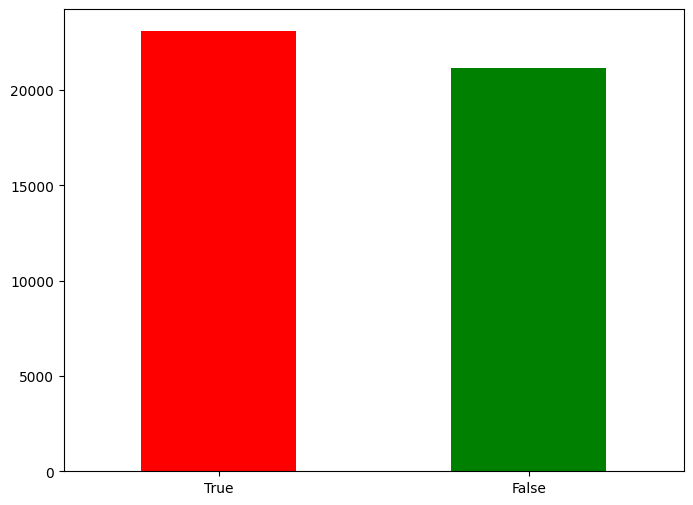

In [ ]:
# Visualizing the duplicated value
plt.figure(figsize = (8,6))
dup.plot(kind = 'bar', color = ['r','g'])
plt.xticks(rotation = 360)

In [ ]:
# Droping the duplicated value
df = df.drop_duplicates()
df.duplicated().value_counts()

False    21170
dtype: int64

In [ ]:
# Checking the shape after dropping the duplicated value
df.shape

(21170, 5)

In [ ]:
# Checking for null value
df.isnull().sum()

App                         0
Translated_Review         672
Sentiment                 669
Sentiment_Polarity        669
Sentiment_Subjectivity    669
dtype: int64

Text(0.5, 1.0, 'Places of missing values in column')

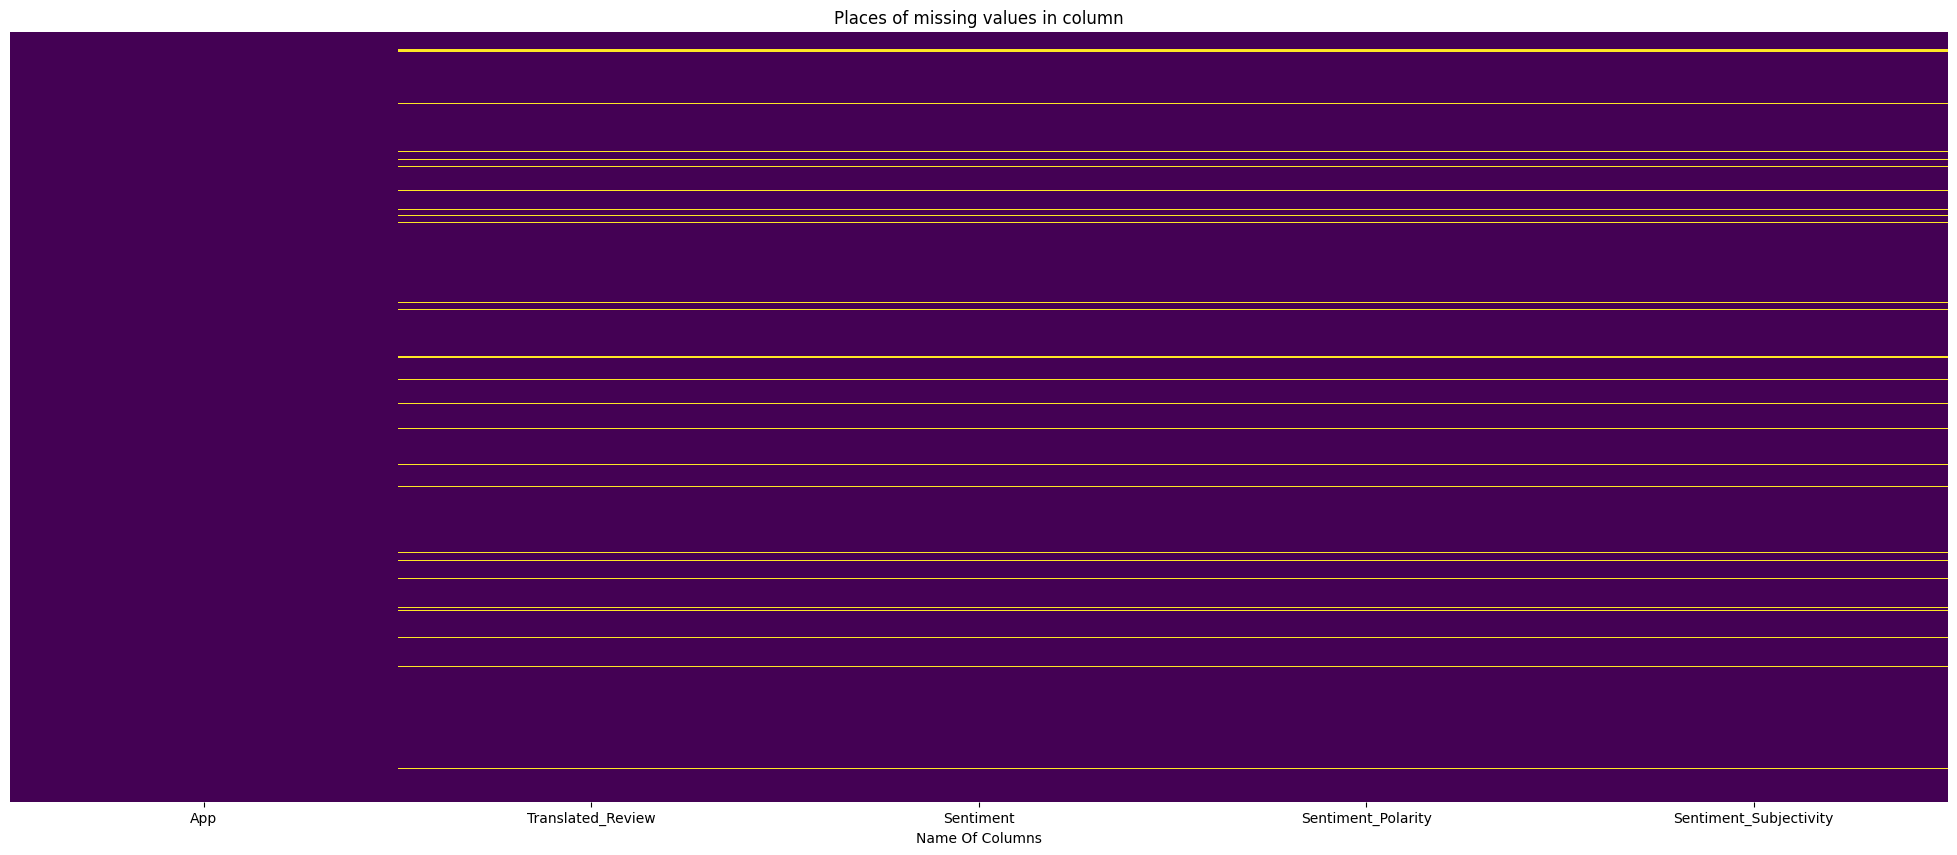

In [ ]:
# Visulaizing null values through heatmap.
plt.figure(figsize=(25, 10))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False,cmap='viridis')
plt.xlabel("Name Of Columns")
plt.title("Places of missing values in column")

**There are a lot of NaN values and we cannot just drop it.**

In [ ]:

df[df['Translated_Review'].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
268,11st,NaN,Neutral,0.0,0.0
362,1LINE – One Line with One Touch,NaN,NaN,NaN,NaN
405,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,NaN,NaN,NaN,NaN
539,"2Date Dating App, Love and matching",NaN,NaN,NaN,NaN
...,...,...,...,...,...
43998,Fancy Widgets,NaN,NaN,NaN,NaN
44039,Fandango Movies - Times + Tickets,NaN,NaN,NaN,NaN
44124,Fantasy Football,NaN,NaN,NaN,NaN
44198,Fantasy Football & NFL News,NaN,NaN,NaN,NaN


**We can say that the apps which do not have a review (NaN value insted) tend to have NaN values in the columns Sentiment, Sentiment_Polarity, and Sentiment_Subjectivity in the majority of the cases.**

In [ ]:
# The rows corresponding to the NaN values in the translated_review column, where the rest of the columns are non null.

df[df['Translated_Review'].isnull() & df['Sentiment'].notna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0


**In the few exceptional cases where the values of remaining columns are non null for null values in the translated_Review column, there seems to be errors. This is because the Sentiment, sentiment ploarity and sentiment subjectivity of the review can be determined if and only if there is a corresponding review.**

**Hence these values are wrong and can be deleted altogather.**

In [ ]:
# Dropping all the null values
df = df.dropna()

In [ ]:
# Now checking the shape
df.shape

(20497, 5)

In [ ]:
# Lets check for the null values
df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

**Now there are no null value we can start analyzing the data**

In [ ]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


**Exploratory Data Analysis**

**Univariate Analysis**

**1. What are the sentiment type for the apps?**

In [ ]:

df['Sentiment'].value_counts()

Positive    13140
Negative     4391
Neutral      2966
Name: Sentiment, dtype: int64

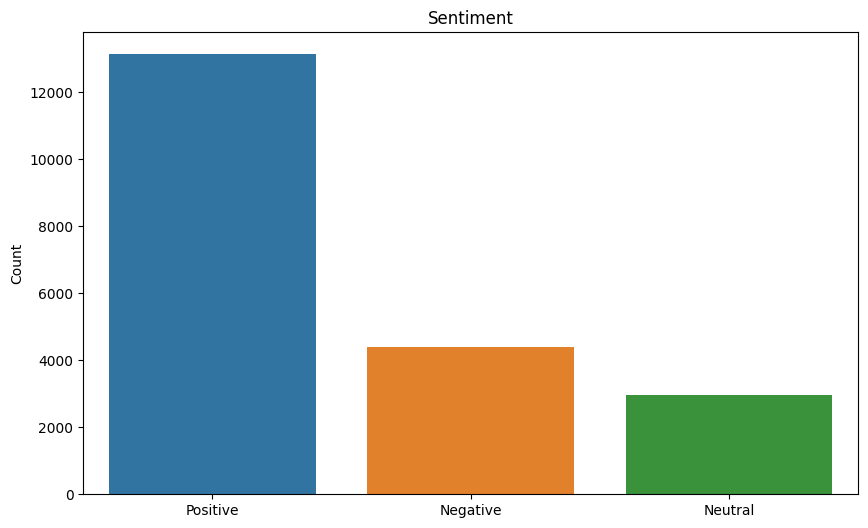

In [ ]:
plt.figure(figsize = (10,6))
sns.barplot(data = df, x = df['Sentiment'].value_counts().keys(), y =df['Sentiment'].value_counts())
plt.title("Sentiment")
plt.ylabel("Count")
plt.show()

**Observation**

**Looks like most of the app has positive response from the user**

**2. Top apps with Sentiment**

In [ ]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [ ]:
app_sentiment = df.groupby(['App'])['Sentiment'].value_counts().iloc[:27]
app_sentiment

App                                               Sentiment
10 Best Foods for You                             Positive     79
                                                  Neutral      11
                                                  Negative      5
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室                  Positive     27
                                                  Neutral       8
                                                  Negative      1
11st                                              Positive     23
                                                  Neutral       9
                                                  Negative      7
1800 Contacts - Lens Store                        Positive     32
                                                  Neutral       5
                                                  Negative      3
1LINE – One Line with One Touch                   Positive     27
                                                  Negative      8
                

<Axes: ylabel='App,Sentiment'>

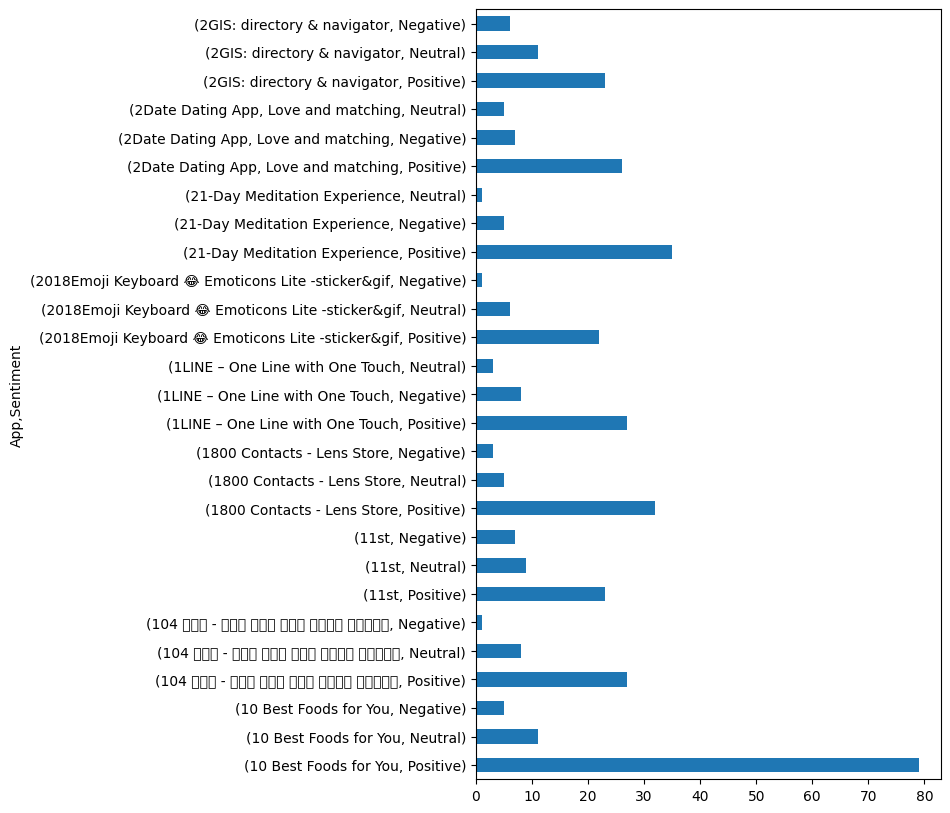

In [ ]:
plt.figure(figsize = (6,10))
app_sentiment.plot(kind = 'barh')

**Observation**

**Looks like the app 10 Best fooods for you has highest positive review**

**3. Find the top 10 positive sentiment apps**

In [ ]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [ ]:
positive_sentiment = df[df['Sentiment'] == 'Positive']
positive_sentiment.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [ ]:
top_positive_sentiment = positive_sentiment.groupby('App')['Sentiment'].value_counts().nlargest(10)
top_positive_sentiment

App                             Sentiment
ColorNote Notepad Notes         Positive     91
Calorie Counter - Macros        Positive     87
Family Locator - GPS Tracker    Positive     85
8fit Workouts & Meal Planner    Positive     82
Calorie Counter - MyNetDiary    Positive     82
Bible                           Positive     80
10 Best Foods for You           Positive     79
Calorie Counter & Diet Tracker  Positive     75
Episode - Choose Your Story     Positive     74
DRAGON BALL LEGENDS             Positive     70
Name: Sentiment, dtype: int64

Text(0.5, 1.0, 'Top 10 positive sentiment apps')

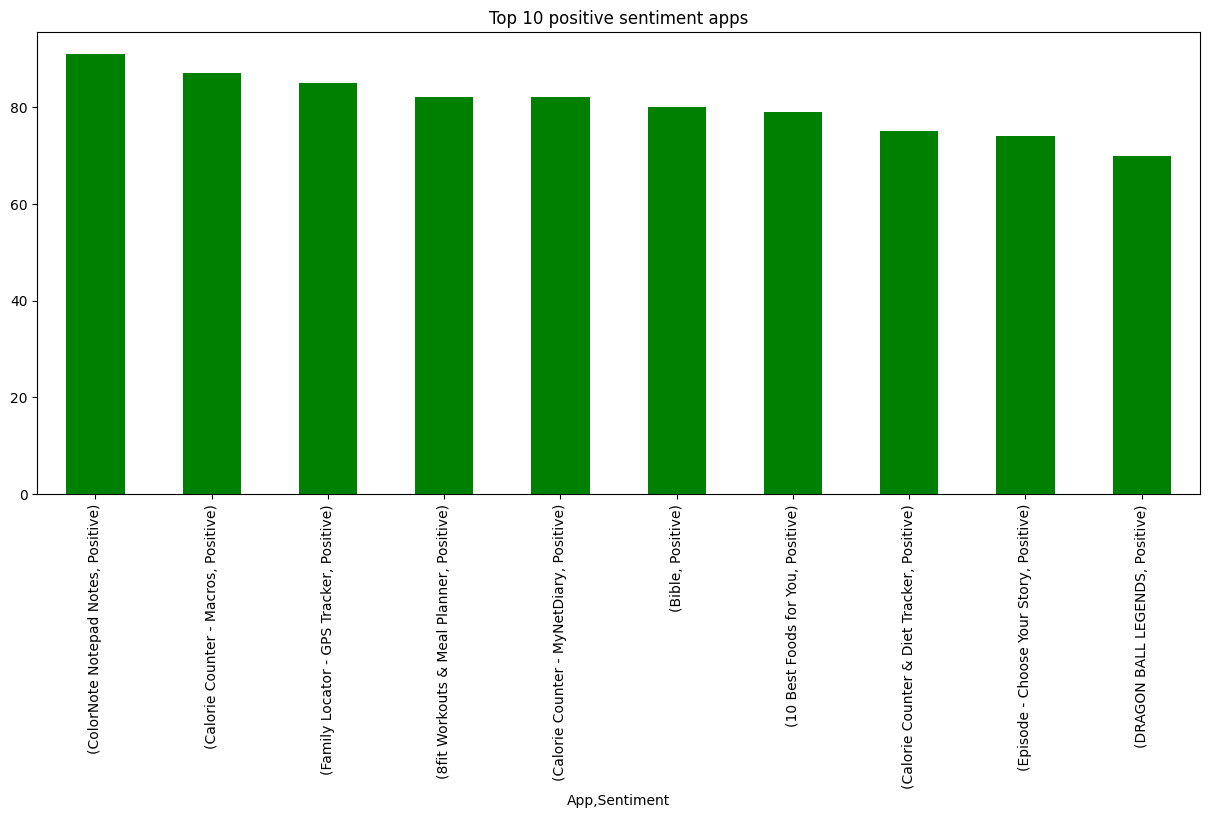

In [ ]:
plt.figure(figsize = (15,6))
top_positive_sentiment.plot(kind = 'bar', color = 'g')
plt.title("Top 10 positive sentiment apps")


Text(0.5, 1.0, 'top_positive_sentiment')

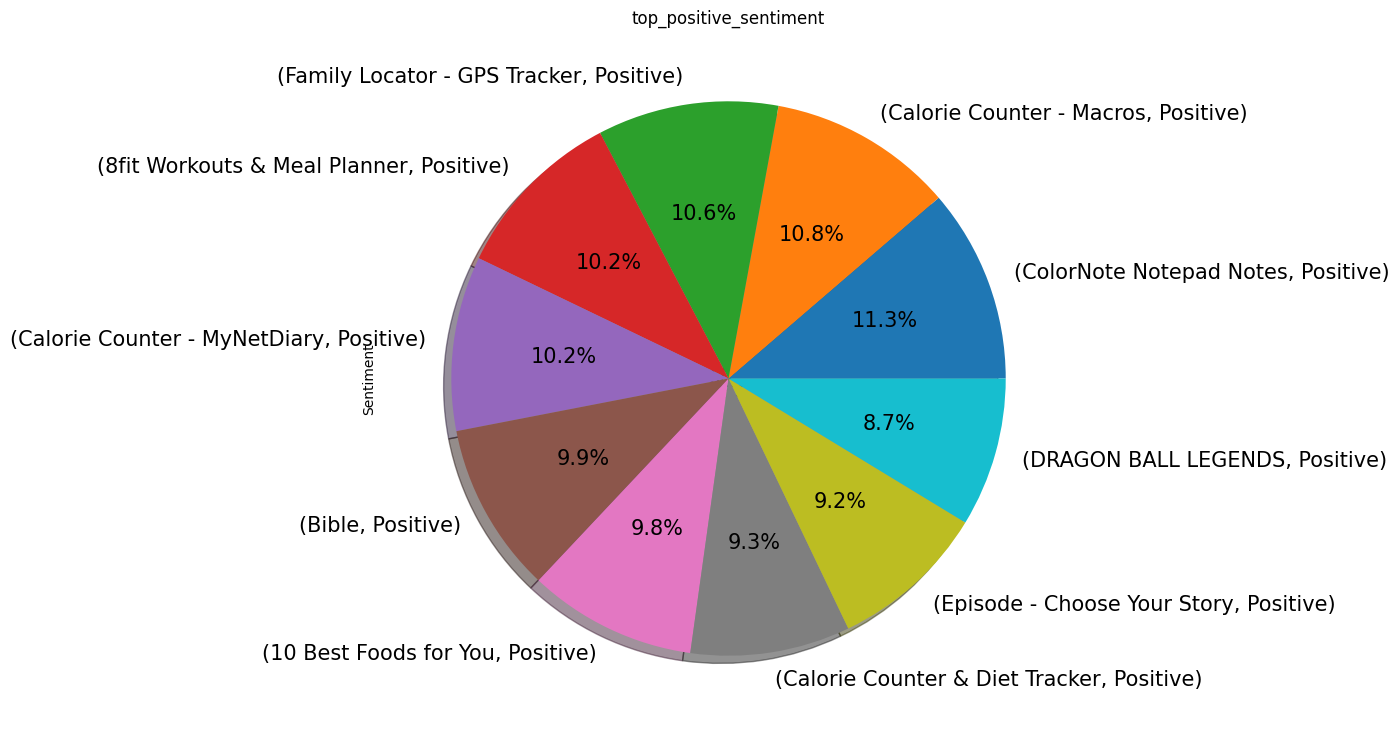

In [ ]:
# Visualizing using pie chart.
textprops = {"fontsize":15} # Font size of text in pie chart
plt.figure(figsize = (9,9)) # fixing pie chart size
top_positive_sentiment.plot(kind = 'pie', shadow = True, autopct='%1.1f%%', textprops =textprops)
plt.title("top_positive_sentiment")

In [ ]:

top_positive_sentiment.keys()

MultiIndex([(       'ColorNote Notepad Notes', 'Positive'),
            (      'Calorie Counter - Macros', 'Positive'),
            (  'Family Locator - GPS Tracker', 'Positive'),
            (  '8fit Workouts & Meal Planner', 'Positive'),
            (  'Calorie Counter - MyNetDiary', 'Positive'),
            (                         'Bible', 'Positive'),
            (         '10 Best Foods for You', 'Positive'),
            ('Calorie Counter & Diet Tracker', 'Positive'),
            (   'Episode - Choose Your Story', 'Positive'),
            (           'DRAGON BALL LEGENDS', 'Positive')],
           names=['App', 'Sentiment'])

# **Trying tree map for this**

In [ ]:
!pip install squarify



In [ ]:
import squarify

Text(0.5, 1.0, 'Top 10 positive sentiment apps')

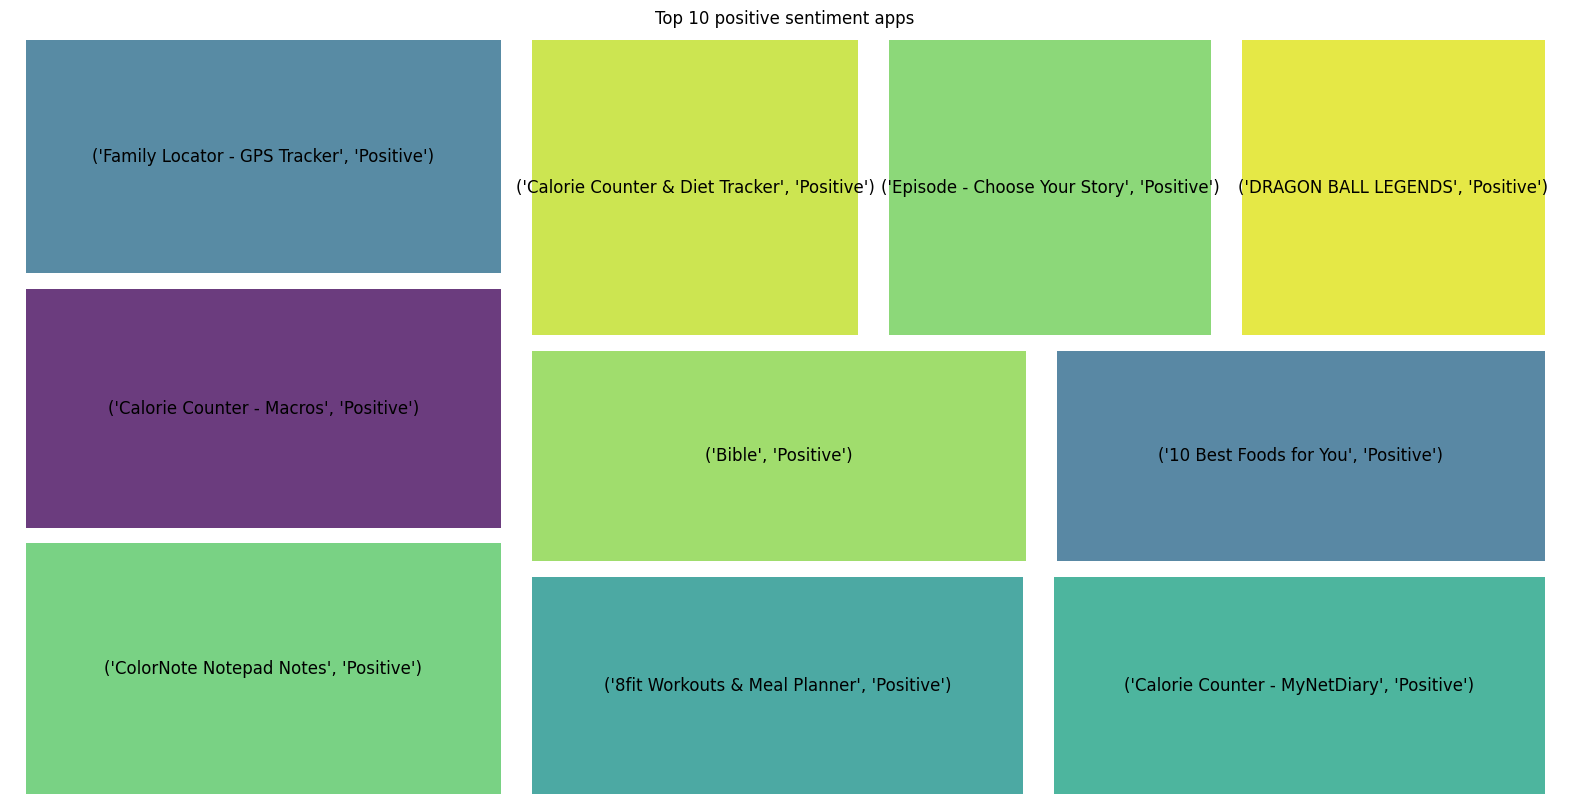

In [ ]:
plt.figure(figsize = (20,10))
squarify.plot(sizes=top_positive_sentiment,alpha=0.8, label = top_positive_sentiment.keys(),
              pad=1, text_kwargs={'fontsize': 12})
plt.axis("off")
plt.title("Top 10 positive sentiment apps")

**4. Find the top 10 Negetive sentiment apps**

In [ ]:
Negetive_sentiment = df[df['Sentiment'] == 'Negative']
Negetive_sentiment.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500,0.500
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200,0.000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200,0.000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800,0.800
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325,0.475


In [ ]:
top_negative_sentiment = Negetive_sentiment.groupby('App')['Sentiment'].value_counts().nlargest(10)
top_negative_sentiment

App                    Sentiment
Angry Birds Classic    Negative     59
Be A Legend: Soccer    Negative     59
Facebook               Negative     59
Cooking Fever          Negative     57
Candy Crush Soda Saga  Negative     50
8 Ball Pool            Negative     46
Agar.io                Negative     44
Basketball Stars       Negative     41
Block Puzzle           Negative     40
Alto's Adventure       Negative     39
Name: Sentiment, dtype: int64

Text(0.5, 1.0, 'Top 10 Negative sentiment apps')

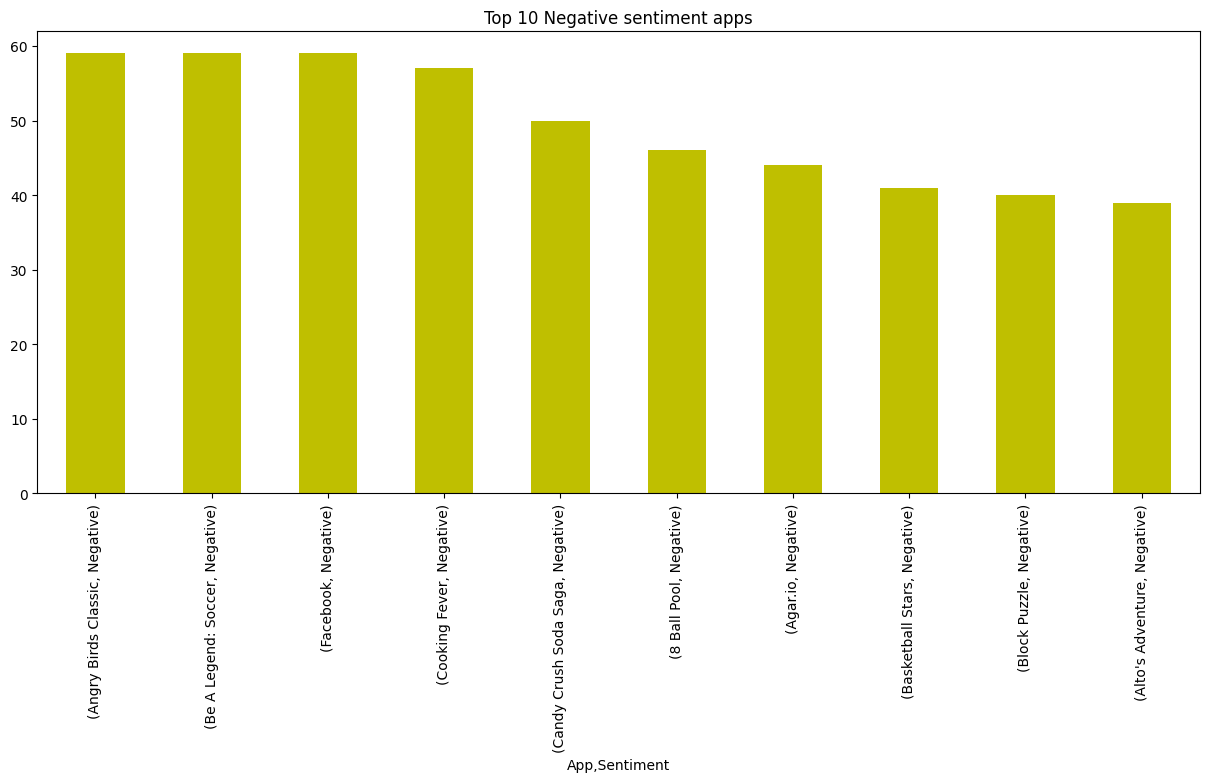

In [ ]:
plt.figure(figsize = (15,6))
top_negative_sentiment.plot(kind = 'bar', color = 'y')
plt.title("Top 10 Negative sentiment apps")

Text(0.5, 1.0, 'top_negative_sentiment')

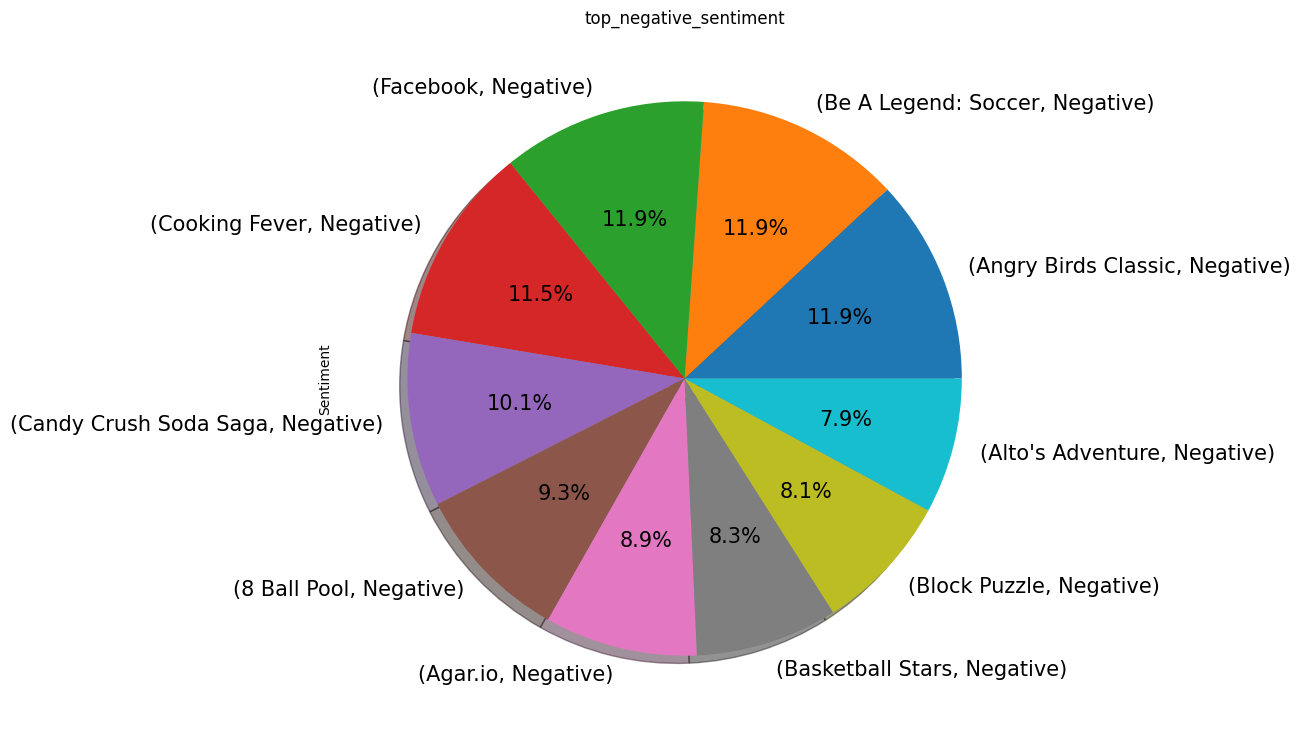

In [ ]:
# Visualizing using pie chart.
textprops = {"fontsize":15} # Font size of text in pie chart
plt.figure(figsize = (9,9)) # fixing pie chart size
top_negative_sentiment.plot(kind = 'pie', shadow = True, autopct='%1.1f%%', textprops =textprops)
plt.title("top_negative_sentiment")

Text(0.5, 1.0, 'Top 10 positive sentiment apps')

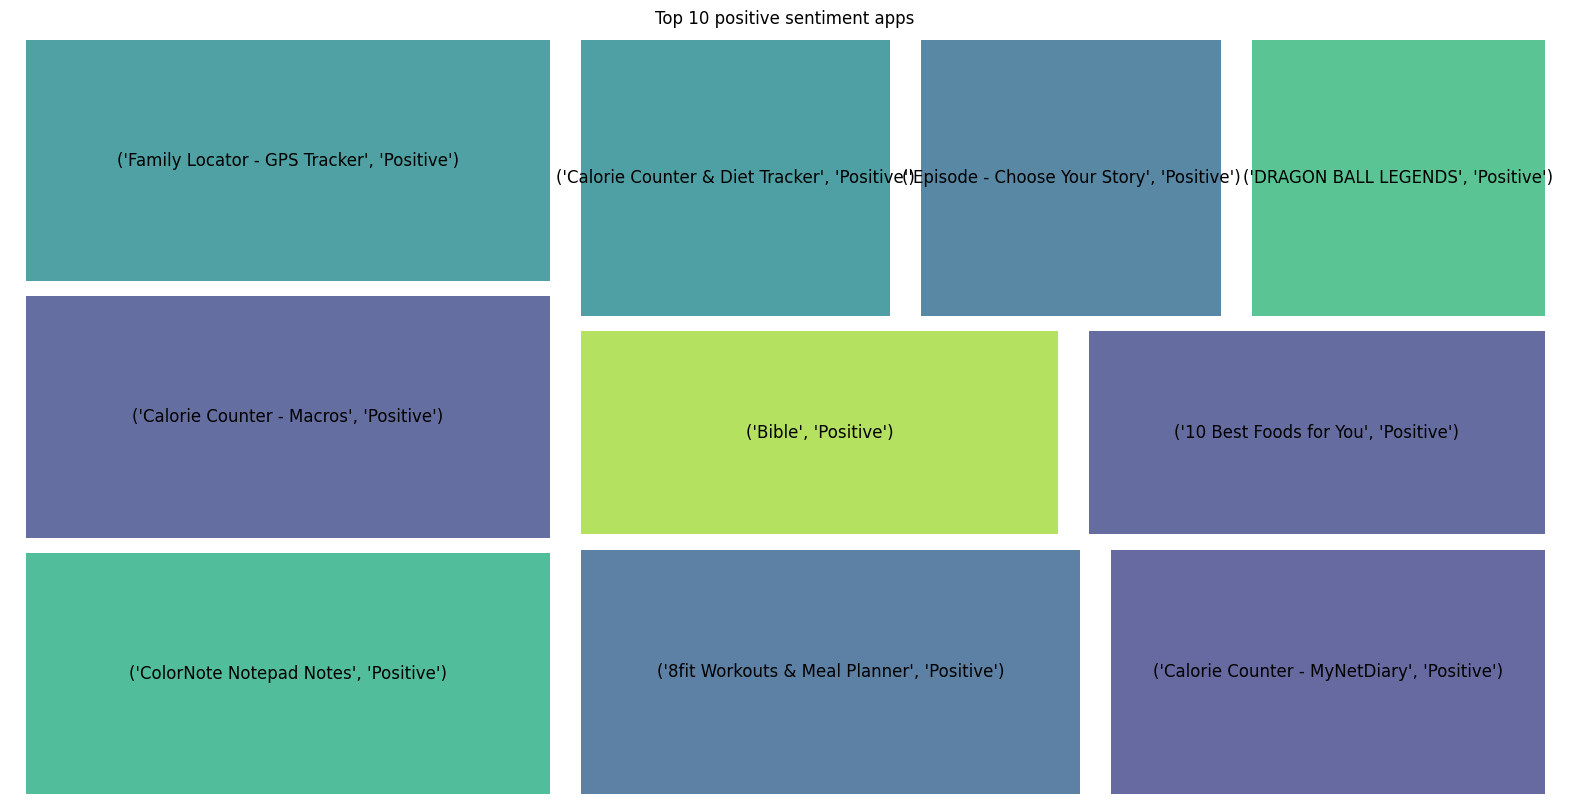

In [ ]:
plt.figure(figsize = (20,10))
squarify.plot(sizes=top_negative_sentiment,alpha=0.8, label = top_positive_sentiment.keys(),
              pad=1, text_kwargs={'fontsize': 12})
plt.axis("off")
plt.title("Top 10 positive sentiment apps")

## **conclusion**

Percentage of free apps = ~92%

Percentage of apps with no age restrictions = ~82%

Most competitive category: Family

Category with the highest number of installs: Game

Category with the highest average app installs: Communicaction

Percentage of apps that are top rated = ~80%

There are 20 free apps that have been installed over a billion times

Minecraft is the only app in the paid category with over 10M installs. This app has also produced the most revenue only from the installation fee.

The median size of all apps in the play store is 12 MB.

The apps whose size varies with device has the highest number average app installs.

The apps whose size is greater than 90 MB has the highest number of average user reviews, ie, they are more popular than the rest.

Helix Jump has the highest number of positive reviews and Angry Birds Classic has the highest number of negative reviews.